<a href="https://colab.research.google.com/github/KenyanGeek/Australian-birds-classifier/blob/master/XGBOOST_on_sea_star_data_for_feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Mounting the Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Importing pandas 
import pandas as pd

#importing dataset into variable df
df = pd.read_csv('/content/drive/My Drive/seastardata/Sunflower_data_complete_abundance_score_lower_limit_with_temp.csv')



In [0]:
#Checking out the dataset
df.head()

,form,exp,type,geozone,date,stemp,btemp,btime,start,visib,maxdepth,current,habitat,species,abundance,year,as_as_date,quarter_year,lat,lon,lat2,lon2,state,semester,abundance2,maxsst30,maxsst60,maxsst90,maxsst180,maxsst360,maxanom30,maxanom60,maxanom90,maxanom180,maxanom360,maxsst30_days,maxsst60_days,maxsst90_days,maxsst180_days,maxsst360_days,maxanom30_days,maxanom60_days,maxanom90_days,maxanom180_days,maxanom360_days
0,5113523,N,2,13350001,6/23/16,0,50,77,19,4,10,3,11,173,2,2016,6/23/16,Q2.2016,49 18.835,-124 14.497,49.18835,-124.14497,BC,1.2016,2,18.12,18.12,18.12,18.12,20.12,4.05,4.05,4.05,4.05,4.35,16,16,16,16,327,17,17,17,17,359
1,5107481,N,2,13350001,1/10/16,0,45,60,10,3,6,3,11,173,2,2016,1/10/16,Q1.2016,49 18.835,-124 14.497,49.18835,-124.14497,BC,1.2016,2,9.18,10.34,12.75,20.12,20.12,1.45,1.62,1.75,3.93,5.30,29,59,82,162,162,29,32,82,162,225
2,5034193,N,2,12090802,5/28/10,10,10,37,14,2,3,3,11,173,3,2010,5/28/10,Q2.2010,48 50.07,-125 08.08,48.50070,-125.08080,BC,1.2010,11,11.14,11.14,11.14,11.14,15.63,0.24,0.24,0.82,1.95,2.79,19,19,19,19,271,19,19,82,133,271
3,50508,N,2,22190002,3/11/06,51,48,39,13,1,7,2,2,173,3,2006,3/11/06,Q1.2006,48 35.473,-122 40.993,48.35473,-122.40993,WA,1.2006,11,8.05,8.22,8.22,13.32,14.99,0.82,0.94,0.94,1.35,2.55,28,35,35,178,209,28,35,35,178,209
4,5045686,N,2,27020107,4/30/11,56,0,30,15,2,3,2,1,173,0,2011,4/30/11,Q2.2011,48 08.413,-123 37.813,48.08413,-123.37813,WA,1.2011,0,8.62,8.62,8.62,10.43,12.09,-0.50,-0.21,0.09,1.03,1.03,0,0,0,177,268,29,39,75,175,175


In [0]:
#checking out the columns
df.columns


Index(['form', 'exp', 'type', 'geozone', 'date', 'stemp', 'btemp', 'btime',
       'start', 'visib', 'maxdepth', 'current', 'habitat', 'species',
       'abundance', 'year', 'as_as_date', 'quarter_year', 'lat', 'lon', 'lat2',
       'lon2', 'state', 'semester', 'abundance2', 'maxsst30', 'maxsst60',
       'maxsst90', 'maxsst180', 'maxsst360', 'maxanom30', 'maxanom60',
       'maxanom90', 'maxanom180', 'maxanom360', 'maxsst30_days',
       'maxsst60_days', 'maxsst90_days', 'maxsst180_days', 'maxsst360_days',
       'maxanom30_days', 'maxanom60_days', 'maxanom90_days', 'maxanom180_days',
       'maxanom360_days'],
      dtype='object')

In [0]:
#Checking out the datatypes
df.dtypes

form                 int64
exp                 object
type                 int64
geozone              int64
date                object
stemp                int64
btemp                int64
btime                int64
start                int64
visib                int64
maxdepth             int64
current              int64
habitat              int64
species              int64
abundance            int64
year                 int64
as_as_date          object
quarter_year        object
lat                 object
lon                 object
lat2               float64
lon2               float64
state               object
semester           float64
abundance2           int64
maxsst30           float64
maxsst60           float64
maxsst90           float64
maxsst180          float64
maxsst360          float64
maxanom30          float64
maxanom60          float64
maxanom90          float64
maxanom180         float64
maxanom360         float64
maxsst30_days        int64
maxsst60_days        int64
m

In [0]:
#earmarking all columns with dtype as object
cols = df.columns[df.dtypes.eq(object)]


In [0]:
#checking if our earmark has worked
cols


Index(['exp', 'date', 'as_as_date', 'quarter_year', 'lat', 'lon', 'state'], dtype='object')

In [0]:
#convert those columns into numeric variables
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')


In [0]:
#checking if our conversion has worked
df.dtypes

form                 int64
exp                float64
type                 int64
geozone              int64
date               float64
stemp                int64
btemp                int64
btime                int64
start                int64
visib                int64
maxdepth             int64
current              int64
habitat              int64
species              int64
abundance            int64
year                 int64
as_as_date         float64
quarter_year       float64
lat                float64
lon                float64
lat2               float64
lon2               float64
state              float64
semester           float64
abundance2           int64
maxsst30           float64
maxsst60           float64
maxsst90           float64
maxsst180          float64
maxsst360          float64
maxanom30          float64
maxanom60          float64
maxanom90          float64
maxanom180         float64
maxanom360         float64
maxsst30_days        int64
maxsst60_days        int64
m

In [0]:
 #isolating the dependent variable
 y = df.loc[:, ['abundance2']]

In [0]:
#checking the dependent variable
y.head()


,abundance2
0,2
1,2
2,11
3,11
4,0


In [0]:
#dropping the dependent variables from our original dataframe
X = df.drop(['abundance', 'abundance2'], axis=1)

In [0]:
#checking the head of the new dataframe with dependent variable dropped 
X.head()   


,form,exp,type,geozone,date,stemp,btemp,btime,start,visib,maxdepth,current,habitat,species,year,as_as_date,quarter_year,lat,lon,lat2,lon2,state,semester,maxsst30,maxsst60,maxsst90,maxsst180,maxsst360,maxanom30,maxanom60,maxanom90,maxanom180,maxanom360,maxsst30_days,maxsst60_days,maxsst90_days,maxsst180_days,maxsst360_days,maxanom30_days,maxanom60_days,maxanom90_days,maxanom180_days,maxanom360_days
0,5113523,NaN,2,13350001,NaN,0,50,77,19,4,10,3,11,173,2016,NaN,NaN,NaN,NaN,49.18835,-124.14497,NaN,1.2016,18.12,18.12,18.12,18.12,20.12,4.05,4.05,4.05,4.05,4.35,16,16,16,16,327,17,17,17,17,359
1,5107481,NaN,2,13350001,NaN,0,45,60,10,3,6,3,11,173,2016,NaN,NaN,NaN,NaN,49.18835,-124.14497,NaN,1.2016,9.18,10.34,12.75,20.12,20.12,1.45,1.62,1.75,3.93,5.30,29,59,82,162,162,29,32,82,162,225
2,5034193,NaN,2,12090802,NaN,10,10,37,14,2,3,3,11,173,2010,NaN,NaN,NaN,NaN,48.50070,-125.08080,NaN,1.2010,11.14,11.14,11.14,11.14,15.63,0.24,0.24,0.82,1.95,2.79,19,19,19,19,271,19,19,82,133,271
3,50508,NaN,2,22190002,NaN,51,48,39,13,1,7,2,2,173,2006,NaN,NaN,NaN,NaN,48.35473,-122.40993,NaN,1.2006,8.05,8.22,8.22,13.32,14.99,0.82,0.94,0.94,1.35,2.55,28,35,35,178,209,28,35,35,178,209
4,5045686,NaN,2,27020107,NaN,56,0,30,15,2,3,2,1,173,2011,NaN,NaN,NaN,NaN,48.08413,-123.37813,NaN,1.2011,8.62,8.62,8.62,10.43,12.09,-0.50,-0.21,0.09,1.03,1.03,0,0,0,177,268,29,39,75,175,175


In [0]:
# plotting feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot


In [0]:
# creating a model
model = XGBClassifier()
model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

[0.101136 0.       0.013206 0.033017 0.       0.014937 0.009732 0.01878  0.011533 0.007305 0.017249 0.025179 0.010651
 0.       0.23601  0.       0.       0.       0.       0.070718 0.061463 0.       0.017836 0.025239 0.027125 0.024106
 0.016141 0.030631 0.007775 0.012508 0.011447 0.017029 0.01957  0.0356   0.023891 0.010065 0.00898  0.017657 0.01151
 0.012642 0.008715 0.013321 0.017297]


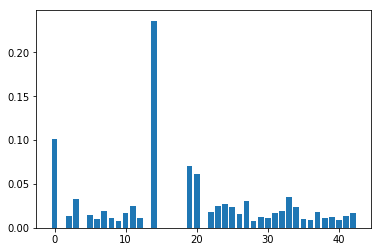

In [0]:
# displaying feature importances
print(model.feature_importances_)
# plotting first plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

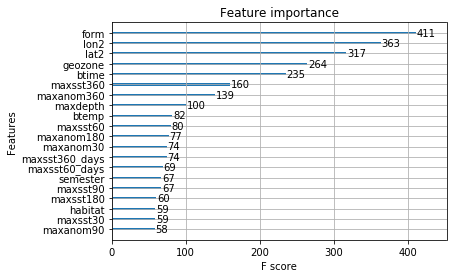

In [0]:
#beatifying the plot to be more readable

import matplotlib.pylab as plt
from matplotlib import pyplot
from xgboost import plot_importance
plot_importance(model, max_num_features=20) # top 10 most important features
plt.show()